In [ ]:
pip install openpyxl

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# _1. min and max value, count of observations in sample, frequency, unique values
# good material https://www.statology.org/frequency-tables-python/
# Input data
# data set
data_set = [1, 2, 2, 3, 4,  3, 4, 5, 6, 7, 7, 7, 8, 9, 10, 12, 12, 13]
# intervals from min to max in range data set
bins_data_set = [0, 2, 4, 6, 8, 10, 12, 14]
# count of intervals from min to max in range data set
count_intervals = 4

In [3]:
# Outcome
# max value
max_value = max(data_set)

# min value
min_value = min(data_set)

# count of observations in sample
cnt_observations = len(data_set)
print('max_value', max_value)
print('min_value', min_value)
print('cnt_observations', cnt_observations)

max_value 13
min_value 1
cnt_observations 18


In [4]:
# create frequency table with input count intervals
frequency, intervals = np.histogram(data_set, bins=count_intervals)
data_frame = pd.DataFrame(index=np.linspace(1, count_intervals, count_intervals), columns=['start', 'end', 'frequency', 'relative frequency'])
# assign the intervals
data_frame['start'] = intervals[:-1]
data_frame['end'] = intervals[1:]
# assign absolute frequency
data_frame['frequency'] = frequency
# assign relative frequency
data_frame['relative frequency'] = frequency / cnt_observations * 100
data_frame

,start,end,frequency,relative frequency
1.0,1.0,4.0,5,27.777778
2.0,4.0,7.0,4,22.222222
3.0,7.0,10.0,5,27.777778
4.0,10.0,13.0,4,22.222222


In [5]:
# create frequency table with input bins
frequency, intervals = np.histogram(data_set, bins=bins_data_set)
data_frame = pd.DataFrame(index=np.linspace(1, len(bins_data_set)-1, len(bins_data_set)-1), columns=['start', 'end', 'frequency', 'relative frequency'])
# assign the intervals
data_frame['start'] = intervals[:-1]
data_frame['end'] = intervals[1:]
# assign absolute frequency
data_frame['frequency'] = frequency
# assign relative frequency
data_frame['relative frequency'] = frequency / cnt_observations * 100

# unique values
data_unique = set(data_set)
data_frame

,start,end,frequency,relative frequency
1.0,0,2,1,5.555556
2.0,2,4,4,22.222222
3.0,4,6,3,16.666667
4.0,6,8,4,22.222222
5.0,8,10,2,11.111111
6.0,10,12,1,5.555556
7.0,12,14,3,16.666667


In [ ]:
# _2. import data from excel, find unique objects, create frequency bar
# Input
# import data
data_frame = pd.read_excel('/Users/mitya/Documents/Coursera Data for Business/example_data_set_trucks.xlsx')

In [10]:
# find columns name
data_columns_name = data_frame.columns[0]
data_frame

'Track Models'

In [14]:
# Outcome
# create new frame with group by first columns
frequency_data_frame = data_frame.groupby([data_columns_name])
# create new table with absolute frequency and sort from max to min
frequency_data_table = frequency_data_frame.value_counts()
frequency_data_table = frequency_data_table.sort_values(ascending=False)
frequency_data_table

Track Models
Ford F-Series          71332
Chevrolet Silverado    54977
Ram P/U                45310
GMC Sierra             21241
Toyota Tacoma          16230
Toyota Tundra          10057
Chevrolet Colorado      7114
Nissan Frontier         3645
GMC Canyon              2423
Nissan Titan            1268
Honda Ridgeline            4
dtype: int64

In [15]:
# quick method to get count, mean, standard deviation, minimum value, maximum value and 25%, 50% and 75% percentiles
measures_central_tendency = frequency_data_table.describe()
measures_central_tendency

count       11.000000
mean     21236.454545
std      24677.872385
min          4.000000
25%       3034.000000
50%      10057.000000
75%      33275.500000
max      71332.000000
dtype: float64

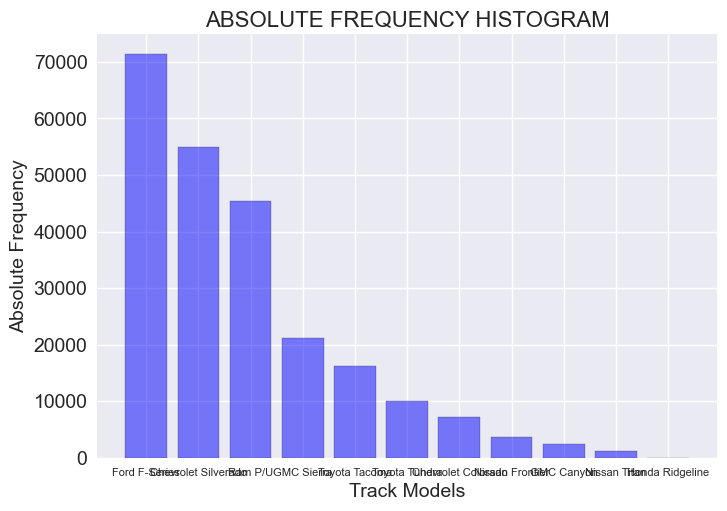

In [16]:
# create frequency bar, X axis = .keys, Y axis = .values
plt.bar(frequency_data_table.keys(), frequency_data_table.values,  color='blue', ec='black', alpha=0.5)
# add labels and modify size
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel(data_columns_name, fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
# add title
plt.title('ABSOLUTE FREQUENCY HISTOGRAM', fontsize=16)
plt.show()

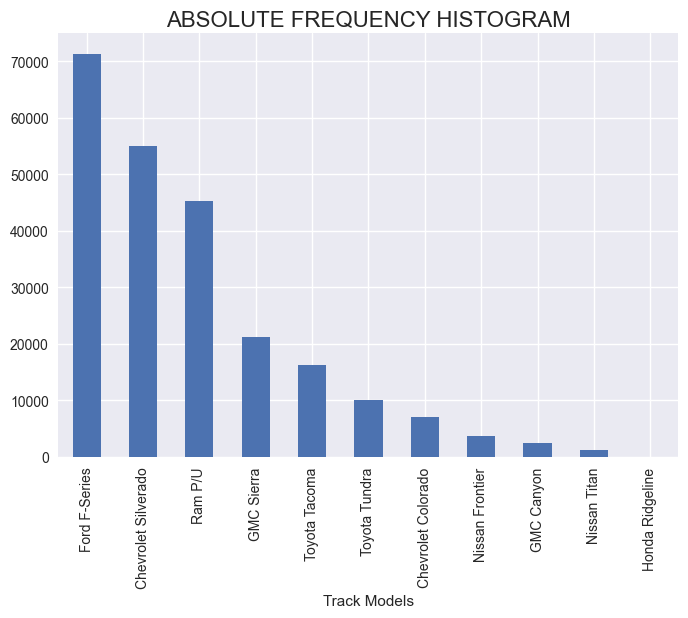

In [21]:
frequency_data_table.plot(kind='bar')
plt.title('ABSOLUTE FREQUENCY HISTOGRAM', fontsize=16)
plt.show()

In [25]:
# _3. Measure of Central Tendency and Measure of Dispersion (Variation)
# Input
# import data
data_frame = pd.read_excel('/Users/mitya/Documents/Coursera Data for Business/example_data_set_temperature.xlsx')
# find columns name
data_columns_name = data_frame.columns[2]
data_frame.head()

,day #,date,New York
0,1,2015-09-15,74.48
1,2,2015-09-14,67.01
2,3,2015-09-13,70.52
3,4,2015-09-12,74.48
4,5,2015-09-11,73.49


In [23]:
# Outcome
mean = data_frame[data_columns_name].mean()
median = data_frame[data_columns_name].median()
st_deviation = data_frame[data_columns_name].std()

In [29]:
# Output
print(f'mean:{mean}\nmedian:{median}\nst_deviation:{st_deviation}')

mean:55.23240231602541
median:55.94
st_deviation:17.379632332373493


In [45]:
# _4. Z-score and percentile by mean, standard deviation and x
# Input
# example data
mean = 54030
st_deviation = 8600
x = 65000

In [43]:
# Outcome
z_score = (x - mean) / st_deviation
percentile = stats.norm(mean, st_deviation).cdf(x)
p_value_right = (stats.norm(mean, st_deviation).sf(x))

In [44]:
# Output
print(f'z_score:{z_score}\npercentile:{percentile}\np_value_right:{p_value_right}')

z_score:-2.5217441860465115
percentile:0.005838729778283059
p_value_right:0.994161270221717


In [46]:
# _5. Z-score and percentile by z-score and percentile
# Input
# example data
z_score = 1.275581395
percentile = 0.8989482328784237

In [47]:
# Outcome
z_score_outcome = stats.norm.ppf(percentile)
percentile_outcome = stats.norm.cdf(z_score)
p_value_right = stats.norm.sf(z_score)

In [51]:
# Output
print(f'z_score:{z_score_outcome}\npercentile:{percentile_outcome}\np_value_right:{p_value_right}')

z_score:1.275581395348838
percentile:0.8989482328167341
p_value_right:0.10105176718326592


In [52]:
# _6. Expected value for random variables
# Input
# import data
data_frame = pd.read_excel('/Users/mitya/Documents/Coursera Data for Business/example_data_set_ipad.xlsx')
# find columns name
column_one_name = data_frame.columns[0]
column_two_name = data_frame.columns[1]
data_frame.head()

,Cnt of iPads sold,Cnt of days
0,230,4
1,231,9
2,232,13
3,233,16
4,234,22


In [53]:
# Outcome
# calculate total sum for all observed
sum = data_frame[column_two_name].sum()
# add probability column in table
data_frame['Probability'] = data_frame[column_two_name] / sum
data_frame.head()

,Cnt of iPads sold,Cnt of days,Probability
0,230,4,0.010959
1,231,9,0.024658
2,232,13,0.035616
3,233,16,0.043836
4,234,22,0.060274


In [57]:
# calculate expected value
def sum_product_excel_function(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return (values * weights).sum() / weights.sum()


expected_value = sum_product_excel_function(data_frame[column_one_name], data_frame['Probability'])

# add (x-mu(expected value))^2 column in table
data_frame['x-mu^2'] = (data_frame[column_one_name] - expected_value) ** 2
# calculate standart deviation
st_deviation = sum_product_excel_function(data_frame['x-mu^2'], data_frame['Probability']) ** 0.5
data_frame

,Cnt of iPads sold,Cnt of days,Probability,x-mu^2
0,230,4,0.010959,78.310377
1,231,9,0.024658,61.611747
2,232,13,0.035616,46.913117
3,233,16,0.043836,34.214487
4,234,22,0.060274,23.515857
5,235,25,0.068493,14.817226
6,236,26,0.071233,8.118596
7,237,29,0.079452,3.419966
8,238,45,0.123288,0.721336
9,239,33,0.090411,0.022706


In [58]:
# Output
print(f'sum:{sum}\nexpected_value:{expected_value}\nst_deviation:{st_deviation}')

sum:365
expected_value:238.84931506849307
st_deviation:4.574111884384643


In [60]:
# _7. Probability between two x values
# Input
# example data
mean = 500
st_deviation = 100
x_one = 490
x_two = 550

In [61]:
# Outcome
percentile_x_one = stats.norm(mean, st_deviation).cdf(x_one)
percentile_x_two = stats.norm(mean, st_deviation).cdf(x_two)
probability = percentile_x_two - percentile_x_one

In [62]:
# Output
print(f'probability:{probability}')

probability:0.2312902985510421


In [87]:
# _8. Create simple random sample from population in file, calculate mean, standard deviation, standard error for sample
# Input
# import data
data_frame = pd.read_excel('/Users/mitya/Documents/Coursera Data for Business/example_data_set_population.xlsx')
# find columns name
column_name = data_frame.columns[0]
# create list with observation from population
population = data_frame[column_name].tolist()
st_deviation_for_population = np.std(population)

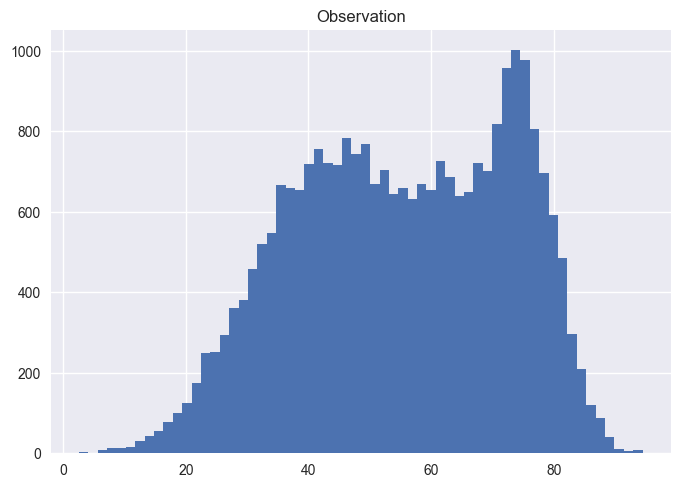

In [106]:
data_frame.hist(bins=60)
plt.show()

In [112]:
# create empty table with columns mean, standard deviation, standard error
sampling_means_and_st_dev = pd.DataFrame({'Mean': [], 'St. Deviation': [], 'St. Error': []})

# Outcome
def sample_generator(sample_size, sample_count):
    for i in range(sample_count):
        sample = random.sample(population, sample_size)
        sampling_means_and_st_dev.loc[i] = (round(np.mean(sample)), round(np.std(sample), 5), round(np.std(sample)/sample_size ** 0.5, 5))
    return sample, sampling_means_and_st_dev

# define sample size
sample_size = 100
# define count of sample
sample_count = 10000

sample, sampling_means_and_st_dev = sample_generator(sample_size, sample_count)
sampling_means_and_st_dev.head()

,Mean,St. Deviation,St. Error
0,56.0,18.26122,1.82612
1,58.0,16.19840,1.61984
2,57.0,16.97683,1.69768
3,56.0,17.53225,1.75322
4,57.0,17.86242,1.78624


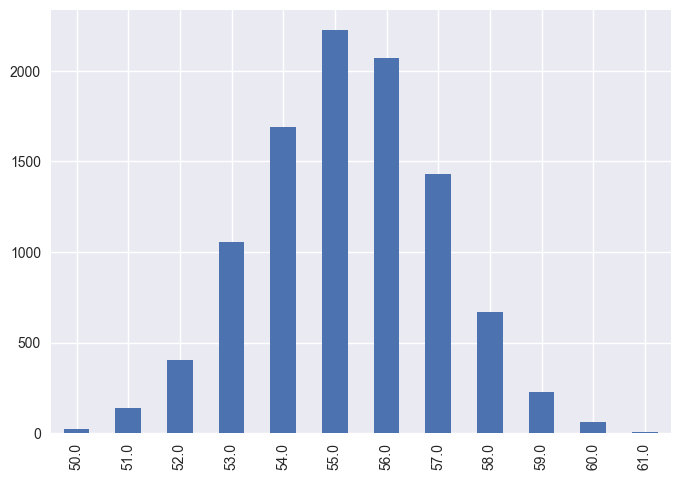

In [123]:
# create frequency table with count mean values (e.g. mean: 65, count: 12), table without name of columns
means_frequency_table = sampling_means_and_st_dev['Mean'].value_counts().sort_index()

average_for_means = np.mean(sampling_means_and_st_dev['Mean'])
st_dev_for_all_sample = np.std(sampling_means_and_st_dev['Mean'])
st_error_for_all_sample = st_deviation_for_population / sample_size ** 0.5
median_for_all_sample = np.median(sampling_means_and_st_dev['Mean'])
means_frequency_table.plot(kind='bar')
plt.show()

In [124]:
# Output
print('median:', median_for_all_sample)
print('standard error:', st_error_for_all_sample)
sampling_means_and_st_dev['Mean'].describe()

median: 55.0
standard error: 1.7379307719100416


count    10000.000000
mean        55.249500
std          1.757828
min         50.000000
25%         54.000000
50%         55.000000
75%         56.000000
max         61.000000
Name: Mean, dtype: float64

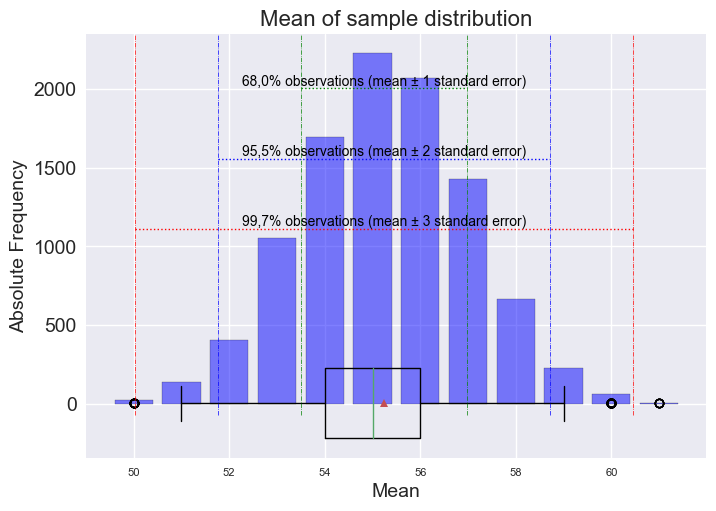

In [125]:
# create frequency bar for table without name of columns, X axis = .keys, Y axis = .values
plt.bar(means_frequency_table.keys(), means_frequency_table.values,  color='blue', ec='black', alpha=0.5)
# create box plot
plt.boxplot(sampling_means_and_st_dev['Mean'], vert=False, widths=max(means_frequency_table.values) / 5, showmeans=True, manage_ticks=False, autorange=True)

plt.axvline(x=average_for_means - st_error_for_all_sample * 3, color='red', linestyle='-.', ymin=0.1, linewidth=0.5)
plt.axvline(x=average_for_means + st_error_for_all_sample * 3, color='red', linestyle='-.', ymin=0.1, linewidth=0.5)
y_hlines = max(means_frequency_table.values) - max(means_frequency_table.values) * 0.5
xmin_hlines = average_for_means - st_error_for_all_sample * 3
xmax_hlines = average_for_means + st_error_for_all_sample * 3
plt.hlines(y_hlines, xmin=xmin_hlines, xmax=xmax_hlines,  color='red', linestyle='dotted', linewidth=1)
text_x = average_for_means
text_y = max(means_frequency_table.values) - max(means_frequency_table.values) * 0.5
plt.text(text_x, text_y, '99,7% observations (mean ± 3 standard error)', color='black', va='bottom', ha='center')

plt.axvline(x=average_for_means - st_error_for_all_sample * 2, color='blue', linestyle='-.', ymin=0.1, linewidth=0.5)
plt.axvline(x=average_for_means + st_error_for_all_sample * 2, color='blue', linestyle='-.', ymin=0.1, linewidth=0.5)
y_hlines = max(means_frequency_table.values) - max(means_frequency_table.values) * 0.3
xmin_hlines = average_for_means - st_error_for_all_sample * 2
xmax_hlines = average_for_means + st_error_for_all_sample * 2
plt.hlines(y_hlines, xmin=xmin_hlines, xmax=xmax_hlines,  color='blue', linestyle='dotted', linewidth=1)
text_x = average_for_means
text_y = max(means_frequency_table.values) - max(means_frequency_table.values) * 0.3
plt.text(text_x, text_y, '95,5% observations (mean ± 2 standard error)', color='black', va='bottom', ha='center')

plt.axvline(x=average_for_means - st_error_for_all_sample, color='green', linestyle='-.', ymin=0.1, linewidth=0.5)
plt.axvline(x=average_for_means + st_error_for_all_sample, color='green', linestyle='-.', ymin=0.1, linewidth=0.5)
y_hlines = max(means_frequency_table.values) - max(means_frequency_table.values) * 0.1
xmin_hlines = average_for_means - st_error_for_all_sample
xmax_hlines = average_for_means + st_error_for_all_sample
plt.hlines(y_hlines, xmin=xmin_hlines, xmax=xmax_hlines,  color='green', linestyle='dotted', linewidth=1)
text_x = average_for_means
text_y = max(means_frequency_table.values) - max(means_frequency_table.values) * 0.1
plt.text(text_x, text_y, '68,0% observations (mean ± 1 standard error)', color='black', va='bottom', ha='center')

# add labels and modify size
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('Mean', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
# add title
plt.title('Mean of sample distribution', fontsize=16)
plt.show()

In [129]:
# _9. Student's T-test, T-value
# Input data
mean_for_sample_one = 45
mean_for_sample_two = 34
st_dev_for_sample_one = 9
st_dev_for_sample_two = 10
first_sample_size = 100
second_sample_size = 100

In [130]:
# Outcome
st_error_for_sample_one = st_dev_for_sample_one / first_sample_size ** 0.5
st_error_for_sample_two = st_dev_for_sample_two / second_sample_size ** 0.5
st_error_for_dif = (st_error_for_sample_one ** 2 + st_error_for_sample_two ** 2) ** 0.5
t_value = (mean_for_sample_one - mean_for_sample_two) / st_error_for_dif
# second param is degree of freedom
p_value = stats.t.sf(t_value, first_sample_size + second_sample_size - 2)

In [131]:
# Output
print('st_error_for_sample_one:', st_error_for_sample_one)
print('st_error_for_sample_two:', st_error_for_sample_two)
print('st_error_for_div:', st_error_for_dif)
print('t_value:', t_value)
print('p_value:', p_value)

st_error_for_sample_one: 0.9
st_error_for_sample_two: 1.0
st_error_for_div: 1.3453624047073711
t_value: 8.176235608718828
p_value: 1.7277720071451342e-14
